## Inverse Kinematics: CCD(Cyclic Coodinate Descent)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Arm:
    def __init__(self, _ax, _ay, _length, _angle):
        self.ax = _ax
        self.ay = _ay
        self.length = _length
        self.angle = _angle
        self.bx = self.ax + self.length * np.cos(self.angle)
        self.by = self.ay + self.length * np.sin(self.angle)

<IPython.core.display.Javascript object>


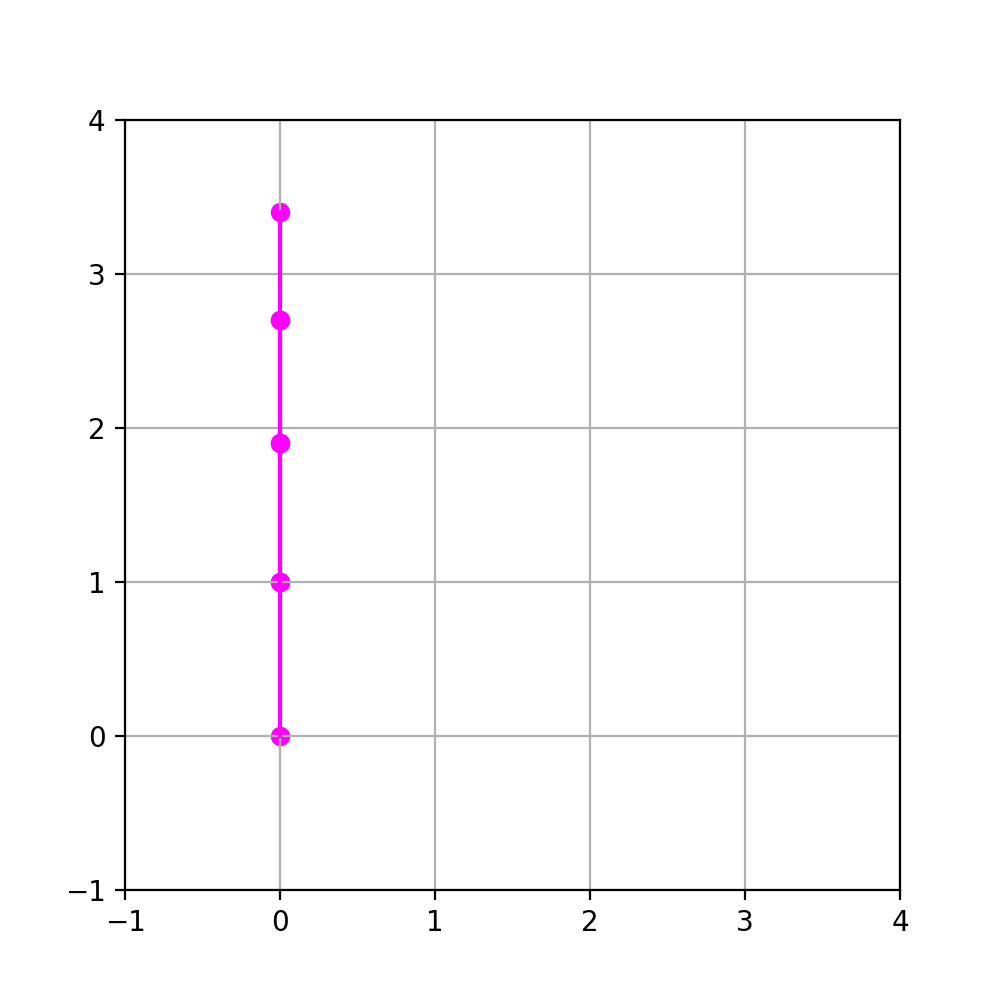

In [3]:
N = 4  # the number of link
OX = 0 # offset x
OY = 0 # offset y

ccd = []
for i in range(N):
    linkLength = 1 - i * 0.1
    initTheta = np.pi / 2   # vertical position
    if i == 0:
        ccd.append(Arm(OX, OY, linkLength, initTheta))
    else:
        ccd.append(Arm(ccd[i-1].bx, ccd[i-1].by, linkLength, initTheta))
        
ccdX = []
ccdY = []
for i in range(N):
    ccdX.append([ccd[i].ax, ccd[i].bx])
    ccdY.append([ccd[i].ay, ccd[i].by])
        
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis([-1,N,-1,N])
ax.grid()
ax.plot(ccdX, ccdY, color='magenta')
ax.scatter(ccdX, ccdY, color='magenta')

In [4]:
# Inverse Kinematiks: CCD

def CCD(arm, _tx, _ty):
    tx = _tx
    ty = _ty
    for i in reversed(range(N)):
        targetTheta = np.arctan2(ty - arm[i].ay, tx - arm[i].ax)
        tipTheta = np.arctan2(arm[N-1].by - arm[i].ay, arm[N-1].bx - arm[i].ax)
        theta = targetTheta - tipTheta;
        for j in range(i, N):
            linkTheta = np.arctan2(arm[j].by - arm[i].ay, arm[j].bx - arm[i].ax)
            linkDist = ((arm[j].bx - arm[i].ax)**2 + (arm[j].by - arm[i].ay)**2)**0.5
            arm[j].bx = arm[i].ax + linkDist * np.cos(theta + linkTheta)
            arm[j].by = arm[i].ay + linkDist * np.sin(theta + linkTheta)
            if j < N - 1:
                arm[j+1].ax = arm[j].bx
                arm[j+1].ay = arm[j].by
    
    PX = []
    PY = []
    for i in range(N):
        PX.append(arm[i].ax)
        PY.append(arm[i].ay)
    PX.append(arm[N-1].bx)
    PY.append(arm[N-1].by)
    
    return PX, PY
    

In [5]:
def motion(event):
    mx = event.xdata
    my = event.ydata
    Mouse.set_data(mx, my)
    
    CX, CY = CCD(ccd, mx, my)
    CLine.set_data(CX, CY)
    CDot.set_data(CX, CY)
    
    plt.draw()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis([-1,N,-1,N])
ax.grid()

CLine, = ax.plot([],[], linestyle='-', color='magenta', alpha=1, label='CCD')
CDot, = ax.plot([],[], marker='o', color='magenta')
Mouse, = ax.plot([],[], marker='x', ms=20, color='red')

plt.connect('motion_notify_event', motion)
plt.legend(loc='lower right')
plt.show()

<IPython.core.display.Javascript object>